In [0]:
def get_player_input(play_area, first_inputter):
    """
    プレイヤーから入力を受け付ける関数

    ゲームの状況をあらわすリストを受け取り、
    プレイヤーの入力で更新したリストと入力を返す
    """
    choosable_area = [str(area) for area in play_area if type(area) is int]
    while(True):
        player_input = input('Choose a number!>>>')
        if player_input in choosable_area:
            player_input = int(player_input)
            break
        else:
            print('Wrong input!\nChoose a number from' \
                  '{}'.format(choosable_area))
    if first_inputter == 1:
        play_area[play_area.index(player_input)] = '○'
    elif first_inputter == 2:
        play_area[play_area.index(player_input)] = '×'
    return play_area, player_input

In [0]:
def get_ai_input(play_area, first_inputter, mode=0, q_table=None, epsilon=None):
    """
    AIの入力を受け付ける関数

    ゲームの状況をあらわすリストとAIのモードおよびその他のオプションを受け取り、
    AIの入力で更新したリストと入力を返す
    """
    choosable_area = [str(area) for area in play_area if type(area) is int]
    if mode == 0:
        ai_input = int(random.choice(choosable_area))
    elif mode == 1:
        ai_input = get_ql_action(play_area, choosable_area, q_table, epsilon)
    if first_inputter == 1:
        play_area[play_area.index(ai_input)] = '×'
    elif first_inputter == 2:
        play_area[play_area.index(ai_input)] = '○'
    return play_area, ai_input

In [0]:
def show_play(play_area, inputter=0, inputted=0):
    """
    TIC TAC TOEの画面を表示する関数

    表示すべきリスト(1～9の数値、○、×から成る)と
    直前の入力者および入力を受け取り、表示する
    """
    clear_output()
    plt.figure(figsize=(6, 6))
    plt.plot()
    plt.xticks([0, 5, 10, 15])
    plt.yticks([0, 5, 10, 15])
    plt.tick_params(labelbottom='off', bottom='off')
    plt.tick_params(labelleft='off', left='off')
    plt.xlim(0, 15)
    plt.ylim(0, 15)

    x_pos = [2.5, 7.5, 12.5]
    y_pos = [2.5, 7.5, 12.5]

    markers = ['$' + str(marker) + '$' for marker in play_area]

    marker_count = 0
    for y in reversed(y_pos):
        for x in x_pos:
            if markers[marker_count] == '$○$':
                color = 'r'
            elif markers[marker_count] == '$×$':
                color = 'k'
            else:
                color = 'b'
            plt.plot(x, y, marker=markers[marker_count], 
                     markersize=30, color=color)
            marker_count += 1
    if inputter == 0:
        title = 'Play the TIC TAC TOE!!'
    else:
        title = '{} chose {}!!'.format(inputter, inputted)
    plt.title(title)
    plt.show()

In [0]:
def judge(play_area, inputter):
    """
    ゲーム終了及び勝者を判定する

    ゲームの状況をあらわすリストと直前の入力者を受け取り、
    ゲームが終了していれば勝者と終了判定を返す
    """
    end_flg = 0
    winner = 'NOBODY'
    first_list = [0, 3, 6, 0, 1, 2, 0, 2]
    second_list = [1, 4, 7, 3, 4, 5, 4, 4]
    third_list = [2, 5, 8, 6, 7, 8, 8, 6]
    for first, second, third in zip(first_list, second_list, third_list):
        if play_area[first] == play_area[second] \
        and play_area[first] == play_area[third]:
            winner = inputter
            end_flg = 1
            break
    choosable_area = [str(area) for area in play_area if type(area) is int]
    if len(choosable_area) == 0:
        end_flg = 1
    return winner, end_flg

In [0]:
def player_vs_randomAI(first_inputter):
    """
    プレイヤーとAI(ランダム)のゲームを実行する関数

    先手(1:プレイヤー、2:AI)を受け取り、ゲームが終了するまで実行する
    """
    inputter1 = 'YOU'
    inputter2 = 'AI'

    play_area = list(range(1, 10))
    show_play(play_area)
    inputter_count = first_inputter
    end_flg = 0
    while True:
        if (inputter_count % 2) == 1:
            print('Your turn!')
            play_area, player_input = get_player_input(play_area, first_inputter)
            show_play(play_area, inputter1, player_input)
            winner, end_flg = judge(play_area, inputter1)
            if end_flg:
                break
        elif (inputter_count % 2) == 0:
            print('AI\'s turn!\n.\n.\n.')
            play_area, ai_input = get_ai_input(play_area, first_inputter, mode=0)
            sleep(3)
            show_play(play_area, inputter2, ai_input)
            winner, end_flg = judge(play_area, inputter2)
            if end_flg:
                break
        inputter_count += 1
    print('{} win!!!'.format(winner))

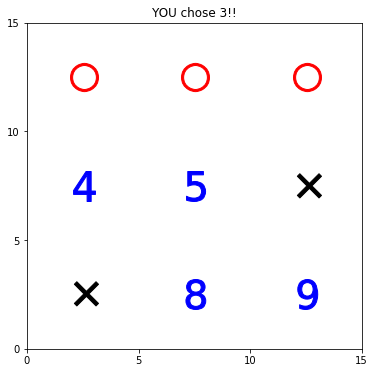

YOU win!!!


In [16]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
import random
from time import sleep
import numpy as np
import math
import time

# ゲームしてみる
# 引数1:プレイヤー先手
# 引数2:プレイヤー後手

player_vs_randomAI(1)

In [0]:
# Qテーブル作成
def make_q_table():
    """
    Qテーブルを作成する関数
    """
    n_columns = 9
    n_rows = 3**9
    return np.zeros((n_rows, n_columns))

In [0]:
def q_learning(play_area, ai_input, reward, play_area_next, q_table, end_flg):
    """
    Qテーブルを更新する関数

    ゲームの状況をあらわすリスト・AIの行動・報酬
    １手番後のゲームの状況をあらわすリスト・Qテーブル・勝利フラグ
    を受け取り、更新したQテーブルを返す
    """
    # 行番号取得
    row_index = find_q_row(play_area)
    row_index_next = find_q_row(play_area_next)
    column_index = ai_input - 1
    # 勝利した or 敗北した場合
    if end_flg == 1:
        q_table[row_index, column_index] = \
        q_table[row_index, column_index] + eta \
        * (reward - q_table[row_index, column_index])
    # まだ続いている場合以外
    else:
        q_table[row_index, column_index] = \
        q_table[row_index, column_index] + eta \
        * (reward + gamma * np.nanmax(q_table[row_index_next,: ]) \
           - q_table[row_index, column_index])
    return q_table

In [0]:
def find_q_row(play_area):
    """
    参照時の状況(state)が参照すべき行番号を計算する関数

    ゲームの状況をあらわすリストを受け取り、行番号を返す
    """
    row_index = 0
    for index in range(len(play_area)):
        if play_area[index] == '○':
            coef = 1
        elif play_area[index] == '×':
            coef = 2
        else:
            coef = 0
        row_index += (3 ** index) * coef
    return row_index

In [0]:
def get_ql_action(play_area, choosable_area, q_table, epsilon):
    """
    AIの行動を決定する関数

    ゲームの状況をあらわすリスト・
    選択可能エリア・Qテーブル・イプシロンを受け取り、行動を返す
    """
    # esilonの確率でランダムな選択をする
    if np.random.rand() < epsilon:
        ai_input = int(random.choice(choosable_area))
    # Qテーブルに従い行動を選択する
    else:
        row_index = find_q_row(play_area)
        first_choice_flg = 1
        for choice in choosable_area:
            if first_choice_flg == 1:
                ai_input = int(choice)
                first_choice_flg = 0
            else:
                if q_table[row_index, ai_input-1] \
                < q_table[row_index, int(choice)-1]:
                    ai_input = int(choice)
    return ai_input

In [0]:
def randomAI_vs_QLAI(first_inputter, q_table, epsilon=0):
    """
    AI(ランダム)とAI(Q学習)のゲームを実行する関数

    先手(1:AI(ランダム)、2:AI(Q学習))とQテーブルを受け取り、
    ゲームが終了するまで実行する
    """
    inputter1 = 'Random AI'
    inputter2 = 'QL AI'

    # Q学習退避用
    ql_input_list = []
    play_area_list = []

    play_area = list(range(1, 10))
    #show_play(play_area)
    inputter_count = first_inputter
    end_flg = 0
    ql_flg = 0
    reward = 0
    while True:
        # Q学習退避用
        play_area_tmp = play_area.copy()
        play_area_list.append(play_area_tmp)
        # Q学習実行フラグ
        ql_flg = 0
        # AI(Q学習)の手番
        if (inputter_count % 2) == 0:
            # QL AI入力
            play_area, ql_ai_input = get_ai_input(play_area, 
                                                  first_inputter,
                                                  mode=1, 
                                                  q_table=q_table, 
                                                  epsilon=epsilon)
            winner, end_flg = judge(play_area, inputter2)
            # Q学習退避用
            ql_input_list.append(ql_ai_input)            
            # 勝利した場合
            if winner == inputter2:
                reward = 1
                ql_flg = 1
            play_area_before = play_area_list[-1]
            ql_ai_input_before = ql_input_list[-1]
        # AI(ランダム)の手番
        elif (inputter_count % 2) == 1:
            play_area, random_ai_input = get_ai_input(play_area, 
                                                      first_inputter+1, 
                                                      mode=0)
            winner, end_flg = judge(play_area, inputter1)
            # AI(ランダム)が先手の場合の初手以外は学習
            if inputter_count != 1:
                ql_flg = 1
        # Q学習実行
        if ql_flg == 1:
            ql_ai_input_before = ql_input_list[-1]
            q_table = q_learning(play_area_before, ql_ai_input_before,
                                 reward, play_area, q_table, end_flg)
        if end_flg:
            break
        inputter_count += 1
    print('{} win!!!'.format(winner))
    return winner, q_table

In [0]:
q_table = make_q_table()
eta = 0.1  # 学習率
gamma = 0.9  # 時間割引率
initial_epsilon = 0.5  # ε-greedy法の初期値

In [17]:
# ランダム vs QL(学習)
# 試行数設定
episode = 500000
winner_list = []
start = time.time()
for i in range(episode):
    epsilon = initial_epsilon * (episode-i) / episode
    winner, _ = randomAI_vs_QLAI(1, q_table, epsilon)
    winner_list.append(winner)
elapsed_time = time.time() - start
print ('elapsed_time:{0}'.format(elapsed_time) + '[sec]')

ストリーミング出力は最後の 5000 行に切り捨てられました。
QL AI win!!!
QL AI win!!!
QL AI win!!!
QL AI win!!!
QL AI win!!!
QL AI win!!!
QL AI win!!!
QL AI win!!!
QL AI win!!!
QL AI win!!!
QL AI win!!!
QL AI win!!!
Random AI win!!!
QL AI win!!!
QL AI win!!!
QL AI win!!!
NOBODY win!!!
QL AI win!!!
QL AI win!!!
QL AI win!!!
NOBODY win!!!
QL AI win!!!
QL AI win!!!
QL AI win!!!
QL AI win!!!
QL AI win!!!
QL AI win!!!
QL AI win!!!
QL AI win!!!
QL AI win!!!
QL AI win!!!
QL AI win!!!
QL AI win!!!
QL AI win!!!
QL AI win!!!
QL AI win!!!
QL AI win!!!
QL AI win!!!
QL AI win!!!
QL AI win!!!
QL AI win!!!
QL AI win!!!
QL AI win!!!
QL AI win!!!
QL AI win!!!
QL AI win!!!
QL AI win!!!
QL AI win!!!
QL AI win!!!
QL AI win!!!
QL AI win!!!
QL AI win!!!
QL AI win!!!
QL AI win!!!
QL AI win!!!
QL AI win!!!
QL AI win!!!
QL AI win!!!
Random AI win!!!
QL AI win!!!
QL AI win!!!
QL AI win!!!
Random AI win!!!
QL AI win!!!
QL AI win!!!
QL AI win!!!
QL AI win!!!
QL AI win!!!
QL AI win!!!
Random AI win!!!
QL AI win!!!
QL AI win!!!
QL AI win!!!
Q

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [20]:
print('勝ち回数')
print('Random AI:{}'.format(winner_list.count('Random AI')))
print('QL AI    :{}'.format(winner_list.count('QL AI')))
print('NOBODY   :{}'.format(winner_list.count('NOBODY')))
print('QLの勝率 :{}'.format(winner_list.count('QL AI') / len(winner_list)))

勝ち回数
Random AI:103937
QL AI    :374853
NOBODY   :21210
QLの勝率 :0.749706


In [0]:
def player_vs_QLAI(first_inputter, q_table, epsilon=0):
    """
    プレイヤーとAI(Q学習)のゲームを実行する関数

    先手(1:プレイヤー)、2:AI(Q学習))を受け取り、ゲームが終了するまで実行する
    """
    inputter1 = 'YOU'
    inputter2 = 'QL AI'

    # Q学習退避用
    ql_input_list = []
    play_area_list = []

    play_area = list(range(1, 10))
    show_play(play_area)
    inputter_count = first_inputter
    end_flg = 0
    ql_flg = 0
    reward = 0
    while True:
        # Q学習退避用
        play_area_tmp = play_area.copy()
        play_area_list.append(play_area_tmp)
        # Q学習実行フラグ
        ql_flg = 0
        # AI(Q学習)の手番
        if (inputter_count % 2) == 0:
            # QL AI入力
            play_area, ql_ai_input = get_ai_input(play_area, 
                                                  first_inputter,
                                                  mode=1, 
                                                  q_table=q_table, 
                                                  epsilon=epsilon)
            show_play(play_area, inputter2, ql_ai_input)
            winner, end_flg = judge(play_area, inputter2)
            # Q学習退避用
            ql_input_list.append(ql_ai_input)            
            # 勝利した場合
            if winner == inputter2:
                reward = 1
                ql_flg = 1
            play_area_before = play_area_list[-1]
            ql_ai_input_before = ql_input_list[-1]
        # プレイヤーの手番
        elif (inputter_count % 2) == 1:
            print('Your turn!')
            # プレイヤーの入力受付
            play_area, player_input = get_player_input(play_area, first_inputter)
            show_play(play_area, inputter1, player_input)
            winner, end_flg = judge(play_area, inputter1)
            # プレイヤーが勝利した場合
            if winner == inputter1:
                reward = -1
            # プレイヤーが先手の場合の初手以外は学習
            if inputter_count != 1:
                ql_flg = 1
        # Q学習実行
        if ql_flg == 1:
#            print('Q学習')
            ql_ai_input_before = ql_input_list[-1]
            q_table = q_learning(play_area_before, ql_ai_input_before,
                                 reward, play_area, q_table, end_flg)
        if end_flg:
            break
        inputter_count += 1
    show_play(play_area)
    print('{} win!!!'.format(winner))
    sleep(1)
    return winner, q_table

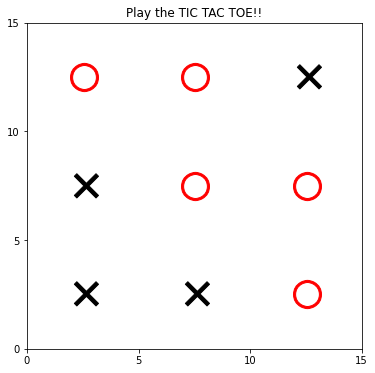

QL AI win!!!


In [26]:
# プレイヤー vs QL
# 試行数設定
episode = 1
winner_list = []
for i in range(episode):
    epsilon = initial_epsilon * (episode-i) / episode
    winner, q_table = player_vs_QLAI(2, q_table, epsilon=0)
    winner_list.append(winner)

In [0]:
np.savetxt('/content/drive/My Drive/Google Colab/q_table.txt', q_table)

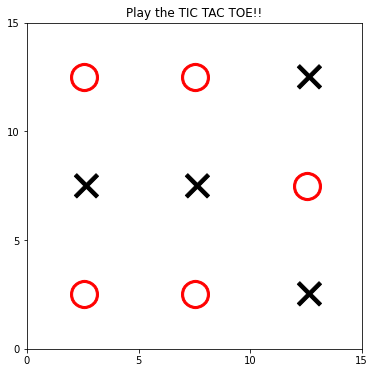

NOBODY win!!!


In [33]:
# trained_q_table = np.loadtxt('/content/drive/My Drive/Google Colab/q_table.txt')


# プレイヤー vs QL
# 試行数設定
episode = 1
winner_list = []
for i in range(episode):
    epsilon = initial_epsilon * (episode-i) / episode
    winner, trained_q_table = player_vs_QLAI(2, trained_q_table, epsilon=0)
    winner_list.append(winner)

In [0]:
np.savetxt('/content/drive/My Drive/Google Colab/q_table.txt', trained_q_table)